<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/thomasmaechler/Documents/GitHub/Case-Study-Classification'

In [3]:
df = pd.read_excel(r"creditcardmarketing.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [5]:
df.isna().sum()

Customer Number          0
Offer Accepted           0
Reward                   0
Mailer Type              0
Income Level             0
# Bank Accounts Open     0
Overdraft Protection     0
Credit Rating            0
# Credit Cards Held      0
# Homes Owned            0
Household Size           0
Own Your Home            0
Average Balance         24
Q1 Balance              24
Q2 Balance              24
Q3 Balance              24
Q4 Balance              24
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('#','no_of')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_number           17976 non-null  int64  
 1   offer_accepted            17976 non-null  object 
 2   reward                    17976 non-null  object 
 3   mailer_type               17976 non-null  object 
 4   income_level              17976 non-null  object 
 5   no_of_bank_accounts_open  17976 non-null  int64  
 6   overdraft_protection      17976 non-null  object 
 7   credit_rating             17976 non-null  object 
 8   no_of_credit_cards_held   17976 non-null  int64  
 9   no_of_homes_owned         17976 non-null  int64  
 10  household_size            17976 non-null  int64  
 11  own_your_home             17976 non-null  object 
 12  average_balance           17976 non-null  float64
 13  q1_balance                17976 non-null  float64
 14  q2_bal

In [10]:
df.drop(['customer_number'], axis = 1, inplace = True) 

In [11]:
df['offer_accepted'].value_counts()

No     16955
Yes     1021
Name: offer_accepted, dtype: int64

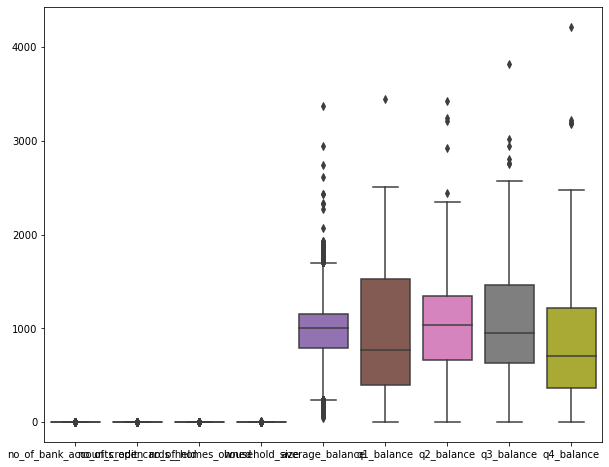

In [12]:
plt.figure(figsize = (10, 8))
#df = df.drop(['customer_number'], axis=1, inplace=True)
df.head()
sns.boxplot(data=df);

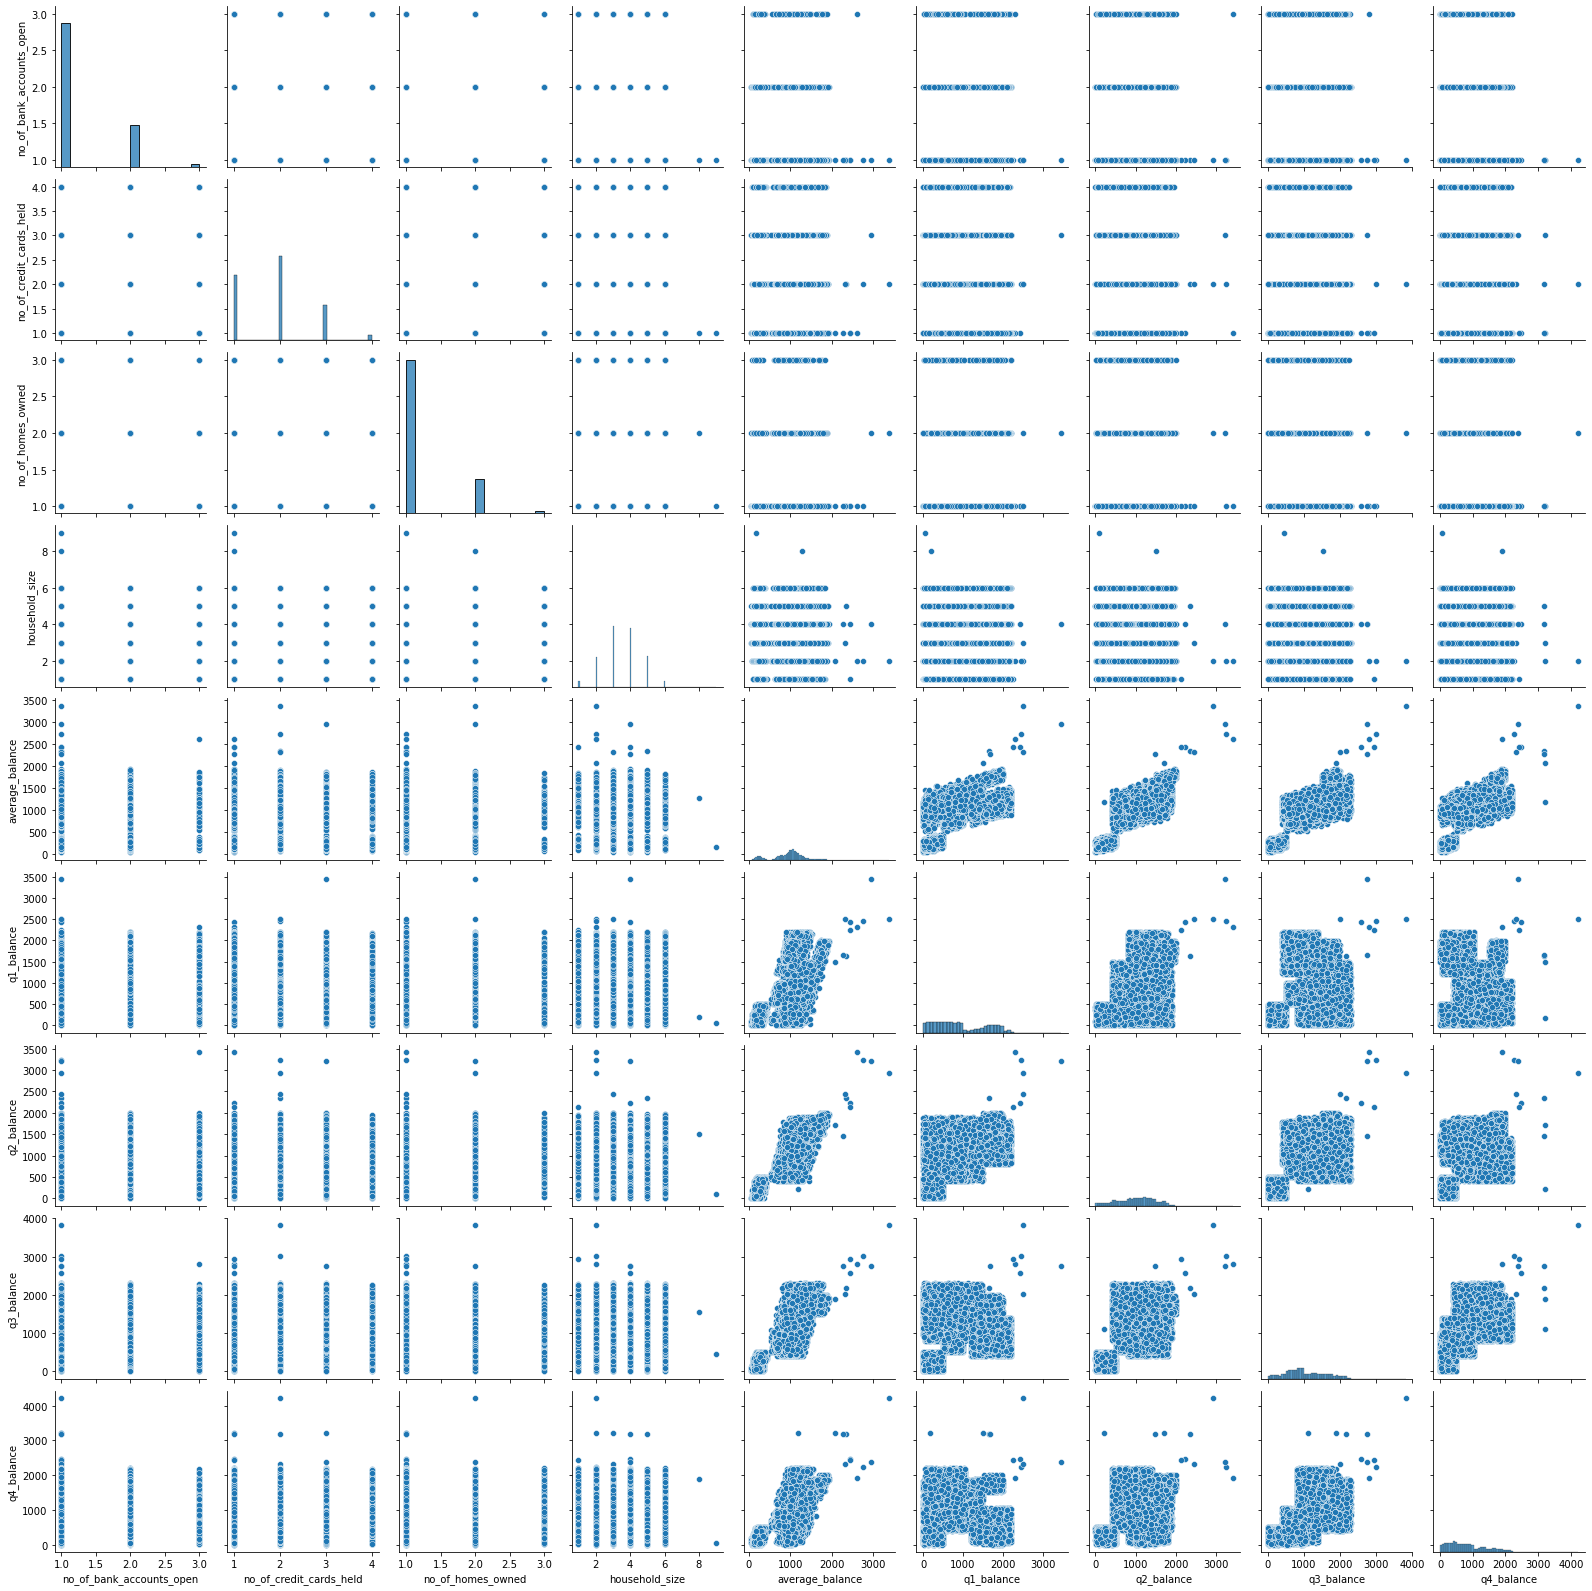

In [13]:
sns.pairplot(df);

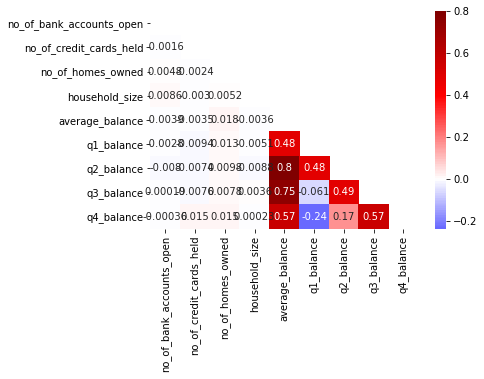

In [14]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='seismic')
plt.show();

In [15]:
df.drop(['q1_balance', 'q2_balance', 'q3_balance', 'q4_balance'], axis = 1, inplace = True) 

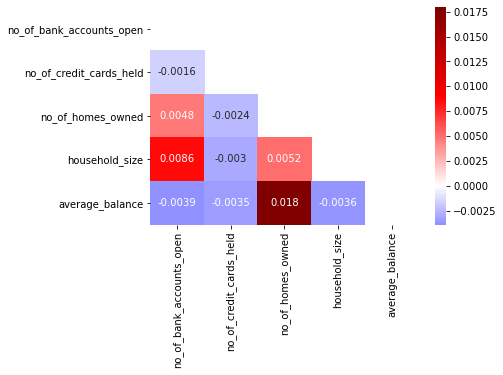

In [16]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df.corr(),
           annot=True,
           center=0,
           mask=mask,
           cmap='seismic')
plt.show();

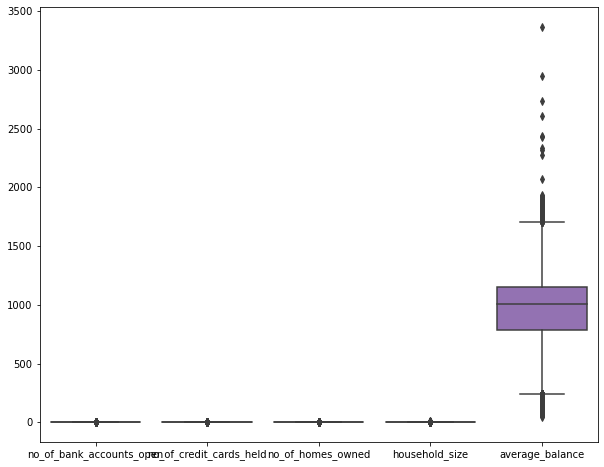

In [17]:
plt.figure(figsize = (10, 8))
#df = df.drop(['customer_number'], axis=1, inplace=True)
df.head()
sns.boxplot(data=df);

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:
#spilting data into numerical and categorical

In [21]:
X = df.select_dtypes(include = np.number)
x = pd.DataFrame(X, columns=X.columns)

In [22]:
cat = df.select_dtypes(include = np.object)

<ipython-input-22-3fa415461a28>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df.select_dtypes(include = np.object)


In [23]:
cat = cat.drop(['offer_accepted'], axis=1)

In [24]:
categorical = pd.get_dummies(cat,
               drop_first=True,
               columns=['reward', 'mailer_type', 'income_level', 'overdraft_protection', 'credit_rating', 'own_your_home'])

In [25]:
X_full = pd.concat([x,categorical],axis=1)

In [26]:
X.head()

,no_of_bank_accounts_open,no_of_credit_cards_held,no_of_homes_owned,household_size,average_balance
0,1,2,1,4,1160.75
1,1,2,2,5,147.25
2,2,2,1,2,276.50
3,2,1,1,4,1219.00
4,1,2,1,6,1211.00


In [27]:
from sklearn.linear_model import LogisticRegression #model
from sklearn.model_selection import train_test_split # tt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # eval
from sklearn.metrics import classification_report #eval
from sklearn.metrics import accuracy_score #eval

In [28]:
y = df['offer_accepted']

In [29]:
#seed 
X_train, X_test, y_train, y_test=train_test_split(X_full,y, test_size=0.3, random_state=40)

In [30]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
y_train = df['offer_accepted']
X_train = X_full
#Train the classifier.
bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred)

0.8203226404598554

In [32]:
from sklearn.metrics import plot_confusion_matrix 

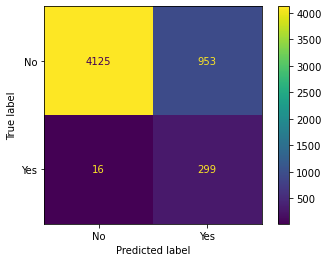

In [33]:
plot_confusion_matrix(bbc, X_test, y_test)

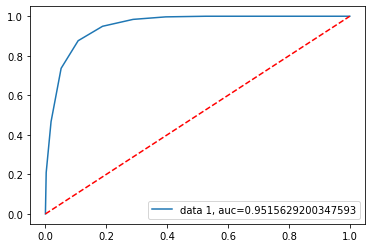

In [34]:
# AUC -
import sklearn.metrics as metrics
y_pred_proba = bbc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--')          # add the red line to the middle of the plot
plt.legend(loc=4)
plt.show()

In [35]:
##  Modelling- candidate model 1 with Log Reg

In [36]:
len(x), len(y), len(df), len(categorical)

(17976, 17976, 17976, 17976)

In [37]:
X_full= pd.concat([x,categorical],axis=1)

In [38]:
X_full.head()

,no_of_bank_accounts_open,no_of_credit_cards_held,no_of_homes_owned,household_size,average_balance,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,1,2,1,4,1160.75,0,0,0,0,0,0,0,0,0
1,1,2,2,5,147.25,0,0,0,0,1,0,0,1,1
2,2,2,1,2,276.50,0,0,1,0,0,0,0,1,1
3,2,1,1,4,1219.00,0,0,0,0,1,0,0,0,0
4,1,2,1,6,1211.00,0,0,0,0,1,0,0,1,1


In [39]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17976 entries, 0 to 17975
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_bank_accounts_open  17976 non-null  int64  
 1   no_of_credit_cards_held   17976 non-null  int64  
 2   no_of_homes_owned         17976 non-null  int64  
 3   household_size            17976 non-null  int64  
 4   average_balance           17976 non-null  float64
 5   reward_Cash Back          17976 non-null  uint8  
 6   reward_Points             17976 non-null  uint8  
 7   mailer_type_Postcard      17976 non-null  uint8  
 8   income_level_Low          17976 non-null  uint8  
 9   income_level_Medium       17976 non-null  uint8  
 10  overdraft_protection_Yes  17976 non-null  uint8  
 11  credit_rating_Low         17976 non-null  uint8  
 12  credit_rating_Medium      17976 non-null  uint8  
 13  own_your_home_Yes         17976 non-null  uint8  
dtypes: flo

In [40]:
# define the model 
lr=LogisticRegression(max_iter=400)

In [41]:
#fit the model to our training data set 
lr.fit(X_train,y_train)

/Users/thomasmaechler/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400)

## Evaluating candidate model 1 

In [42]:
y_pred=lr.predict(X_test)
# for our test data make some pred of y (using the trained model)

In [43]:
accuracy_score(y_test,y_pred)
# comparing each actual y to each pred y for the test data set 

0.9415909512330799

In [44]:
# we were right 88% of the time in classifying our status 
confusion_matrix(y_test,y_pred)

array([[5078,    0],
       [ 315,    0]])

In [45]:
from sklearn.metrics import plot_confusion_matrix 

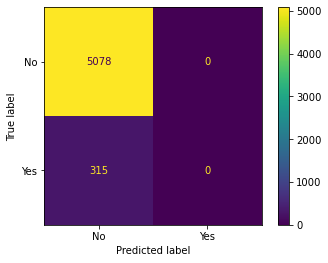

In [46]:
plot_confusion_matrix(lr, X_test, y_test)

In [47]:
cnfmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnfmat, columns=np.unique(y_test), 
                     index=np.unique(y_test))
df_cm

,No,Yes
No,5078,0
Yes,315,0


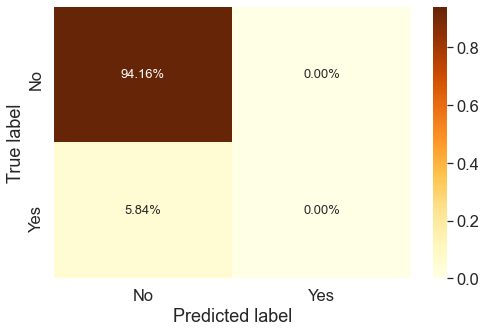

In [48]:
# set the names of the axis for the confusion matrix
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# setting the fontsize of the plot
sns.set(font_scale=1.5)

#setting the plot size
fig, ax = plt.subplots(figsize = (8,5))

sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

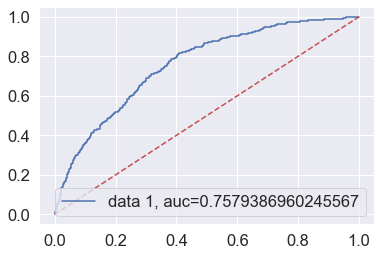

In [49]:
# AUC -
import sklearn.metrics as metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--')          # add the red line to the middle of the plot
plt.legend(loc=4)
plt.show()

## Evaluating candidate model 2 SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [51]:
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

In [52]:
lr.fit(X_train_sm,y_train_sm)

LogisticRegression(max_iter=400)

In [53]:
y_pred_sm = lr.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_sm)

0.7711848692749861

In [55]:
cnfmat_sm=confusion_matrix(y_test,y_pred_sm)

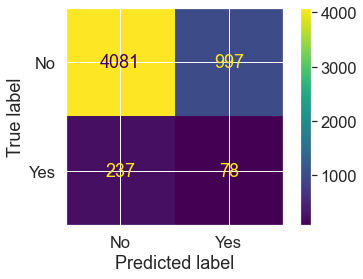

In [56]:
plot_confusion_matrix(lr,X_test,y_test)

In [57]:
cnfmat_sm= confusion_matrix(y_test, y_pred)
# setting up a dataframe for the confusion matrix
df_sm = pd.DataFrame(cnfmat_sm, columns=np.unique(y_test), 
                     index=np.unique(y_test))
df_sm

,No,Yes
No,5078,0
Yes,315,0


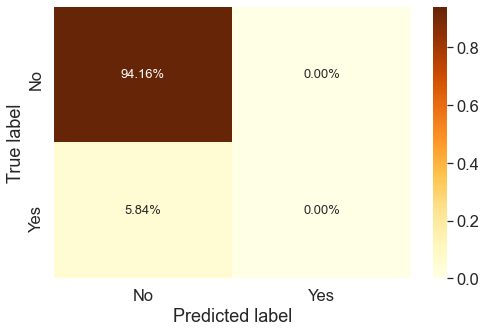

In [58]:
# set the names of the axis for the confusion matrix
df_sm.index.name = 'True label'
df_sm.columns.name = 'Predicted label'

# setting the fontsize of the plot
sns.set(font_scale=1.5)

#setting the plot size
fig, ax = plt.subplots(figsize = (8,5))

sns.heatmap(df_sm/df_sm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

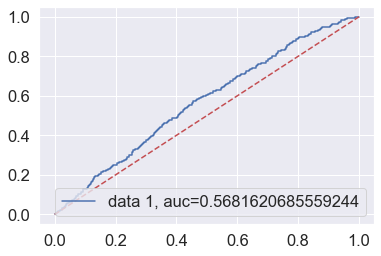

In [59]:
# AUC -
import sklearn.metrics as metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Yes')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0,1],[0,1],'r--')          # add the red line to the middle of the plot
plt.legend(loc=4)
plt.show()

Min Max - kept - 